# Modelos de aprendizado de máquina
## Árvores de decisão na prática
### Introdução

LINDNER, Annabel; SEEGENER, Stefan. IA Desplugada: desplugando a inteligência artificial. FAU – Friedrich-Alexander Universitat Erlangen-Nürnberg, [s. d.]. Disponível em: https://www.aiunplugged.org/portuguese.pdf. Acesso em: 18 abr. 2024.

Os modelos de aprendizado de máquina são desenvolvidos para reconhecer padrões em conjuntos de dados. Essa habilidade permite que eles façam previsões ou tomem decisões baseadas em novas informações ainda não vistas durante o treinamento.

Um método comum nesse processo é o uso de árvores de decisão, que funcionam dividindo os dados em subconjuntos mais homogêneos, baseando-se na seleção de atributos. Esse processo começa com o conjunto de dados inteiro e, em seguida, escolhe-se o atributo que, ao ser usado como critério de divisão, resulta em subconjuntos com maior uniformidade em relação à variável-alvo.

O procedimento continua de forma iterativa, dividindo cada subconjunto, até que os dados dentro de um subconjunto sejam suficientemente homogêneos, resultando, então, em um conjunto de regras para classificação.

Veremos um exemplo prático e ilustrativo desse modelo.


### Introduzindo o exemplo – macacos mordem ou não?

Para a demonstração da árvore de decisão, utilizaremos um recurso presente no livro AI Unplugged. Temos um exemplo prático: a expressão de macacos digitais após serem alimentados. O objetivo? Desenvolver um conjunto de regras que nos permita prever comportamentos futuros, especificamente se um macaco vai nos morder ou não.
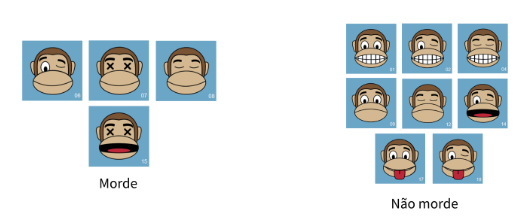


Elas representam um conjunto de dados, e cada expressão nos dá pistas sobre seus comportamentos. Ao alimentá-los, catalogamos suas reações, um sorriso, um olhar, até mesmo a mostra de dentes. Nosso desafio é discernir quais expressões correspondem a um macaco amigável e quais alertam sobre um provável comportamento agressivo.

Mas há uma complexidade adicional que devemos considerar. Se criarmos regras muito específicas com base apenas nesses exemplos, é possível falhar em reconhecer um macaco mordedor no futuro. Em IA, isso é conhecido como o problema de overfitting, em que o modelo aprende os dados de treino tão bem que falha em generalizar para novos dados.

Para criar o nosso modelo, vamos transformar as imagens dos macacos em uma tabela de características e rótulos.

Depois, medimos a entropia, que, no contexto de IA, é uma medida de incerteza ou impureza. No nosso caso, ela quantifica a incerteza de prever se um macaco vai ou não morder. Uma entropia alta significa muita incerteza, e uma entropia baixa, pouca incerteza.

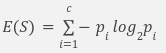


Buscamos, então, reduzir essa entropia com a regra de particionar o exemplo de acordo com um atributo. O ganho de informação é calculado a partir da entropia para cada um dos atributos. Ele nos diz quanto a incerteza sobre a mordida diminuir após observarmos uma determinada característica.

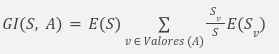

Por exemplo, se calcularmos o ganho de informação na divisão da classe de sorriso fechado, temos que essa característica é bastante informativa sobre a tendência de morder. Isso porque a classe de “sorriso fechado” tem nove exemplos que não têm essa característica e três exemplos que têm essa característica. Dividimos a nossa base de dados em duas, a partir dessa classe, ou seja, temos agora dois grupos: um que tem todos os exemplos de dados com sim, para sorriso fechado, e outro que tem todos os exemplos de dado com não, para sorriso fechado.

Agora, todos os exemplos do grupo do “sim” mordem. E os exemplos do “não” têm uma entropia reduzida, com oito exemplos que mordem e apenas um que não mordem, mostrando pouca incerteza.

Por essa característica ter o maior ganho de informação, a escolhemos para criar uma regra de partição da base de dados, ou seja, quando estivermos classificando um exemplo, a primeira coisa que iremos fazer é perguntar: “Ele sorri com a boca fechada?”, se sim, podemos classificar que aquele macaco morde, se não, continuamos a aplicar outras divisões com regras similares a essa.

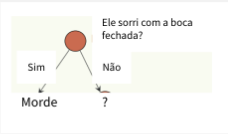

Em seguida, pegamos cada subgrupo construído e aplicamos o processo novamente, até que tenhamos grupos suficientes homogêneos ou até que atinjamos um limite predeterminado de profundidade da árvore.

No caso do exemplo, após a aplicação da regra de sorriso fechado e de se o olho está em X, conseguimos dividir completamente a nossa base, minimizando a entropia para 0, sem incerteza.

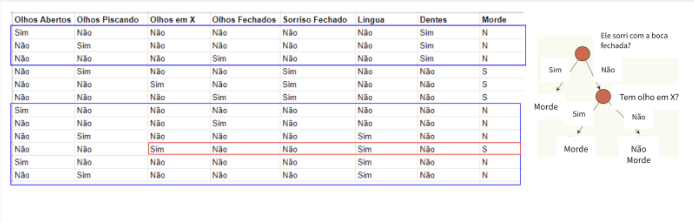

### Criando a árvore de decisão com o sklearn
Esse modelo pode ser implementado, utilizando sklearn.

Importamos as bibliotecas


In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

In [3]:
X = pd.read_csv('caracteristicas.csv')
y = pd.read_csv('morde_ou_nao.csv')


In [4]:
clf = DecisionTreeClassifier(criterion="entropy")
model = clf.fit(X, y)

Podemos imprimir, por fim, a árvore gerada, com o comando plot_tree.

Para isso, primeiramente descrevemos a lista de características e a lista dos rótulos

In [5]:
caracteristicas = ['Olho Aberto', 'Piscadinha', 'Olho X',
                   'Olho Fechado', 'Sorriso Fechado', 'Língua', 'Dente']
morde = ['Não Morde', 'Morde']

Em seguida, imprimimos a árvore de decisão na tela.

O resultado é um gráfico com quadrados em formato de árvore ao contrário. Temos um quadrado superior que é a raiz. Nele, o valor de entropia é alto, com 0.918, e ele está classificando todos os exemplos como “não morde”. Ele se ramifica em dois quadrados no nível abaixo, fazendo isso com a pergunta “sorriso fechado <= 0.5”?


Aqui, 0 representa não, e 1 representa sim.

Para a direita, no 1, há um quadrado com entropia 0, que classifica todos os exemplos que chegaram até ali como da classe “morde”.

Para a esquerda, no 0, temos outro quadrado, mas com entropia reduzida de 0.503. Nele, é feita a pergunta “olho X <= 0.5”. Se a resposta for positiva, ele vai para um quadrado que classifica todos os exemplos que chegam até ali como “não morde”, e, se for negativo, ele vai para um quadrado que classifica todos os exemplos que chegam até ali como “morde”.

Os três quadrados finais zeram a entropia e são chamados de folhas da árvore, sendo assim é feita a classificação de um exemplo na base de dados. Depois, esse conjunto de regras determinada matematicamente pode ser aplicado para qualquer exemplo que ainda não foi visto, realizando uma predição de se o macaco irá morder ou não.

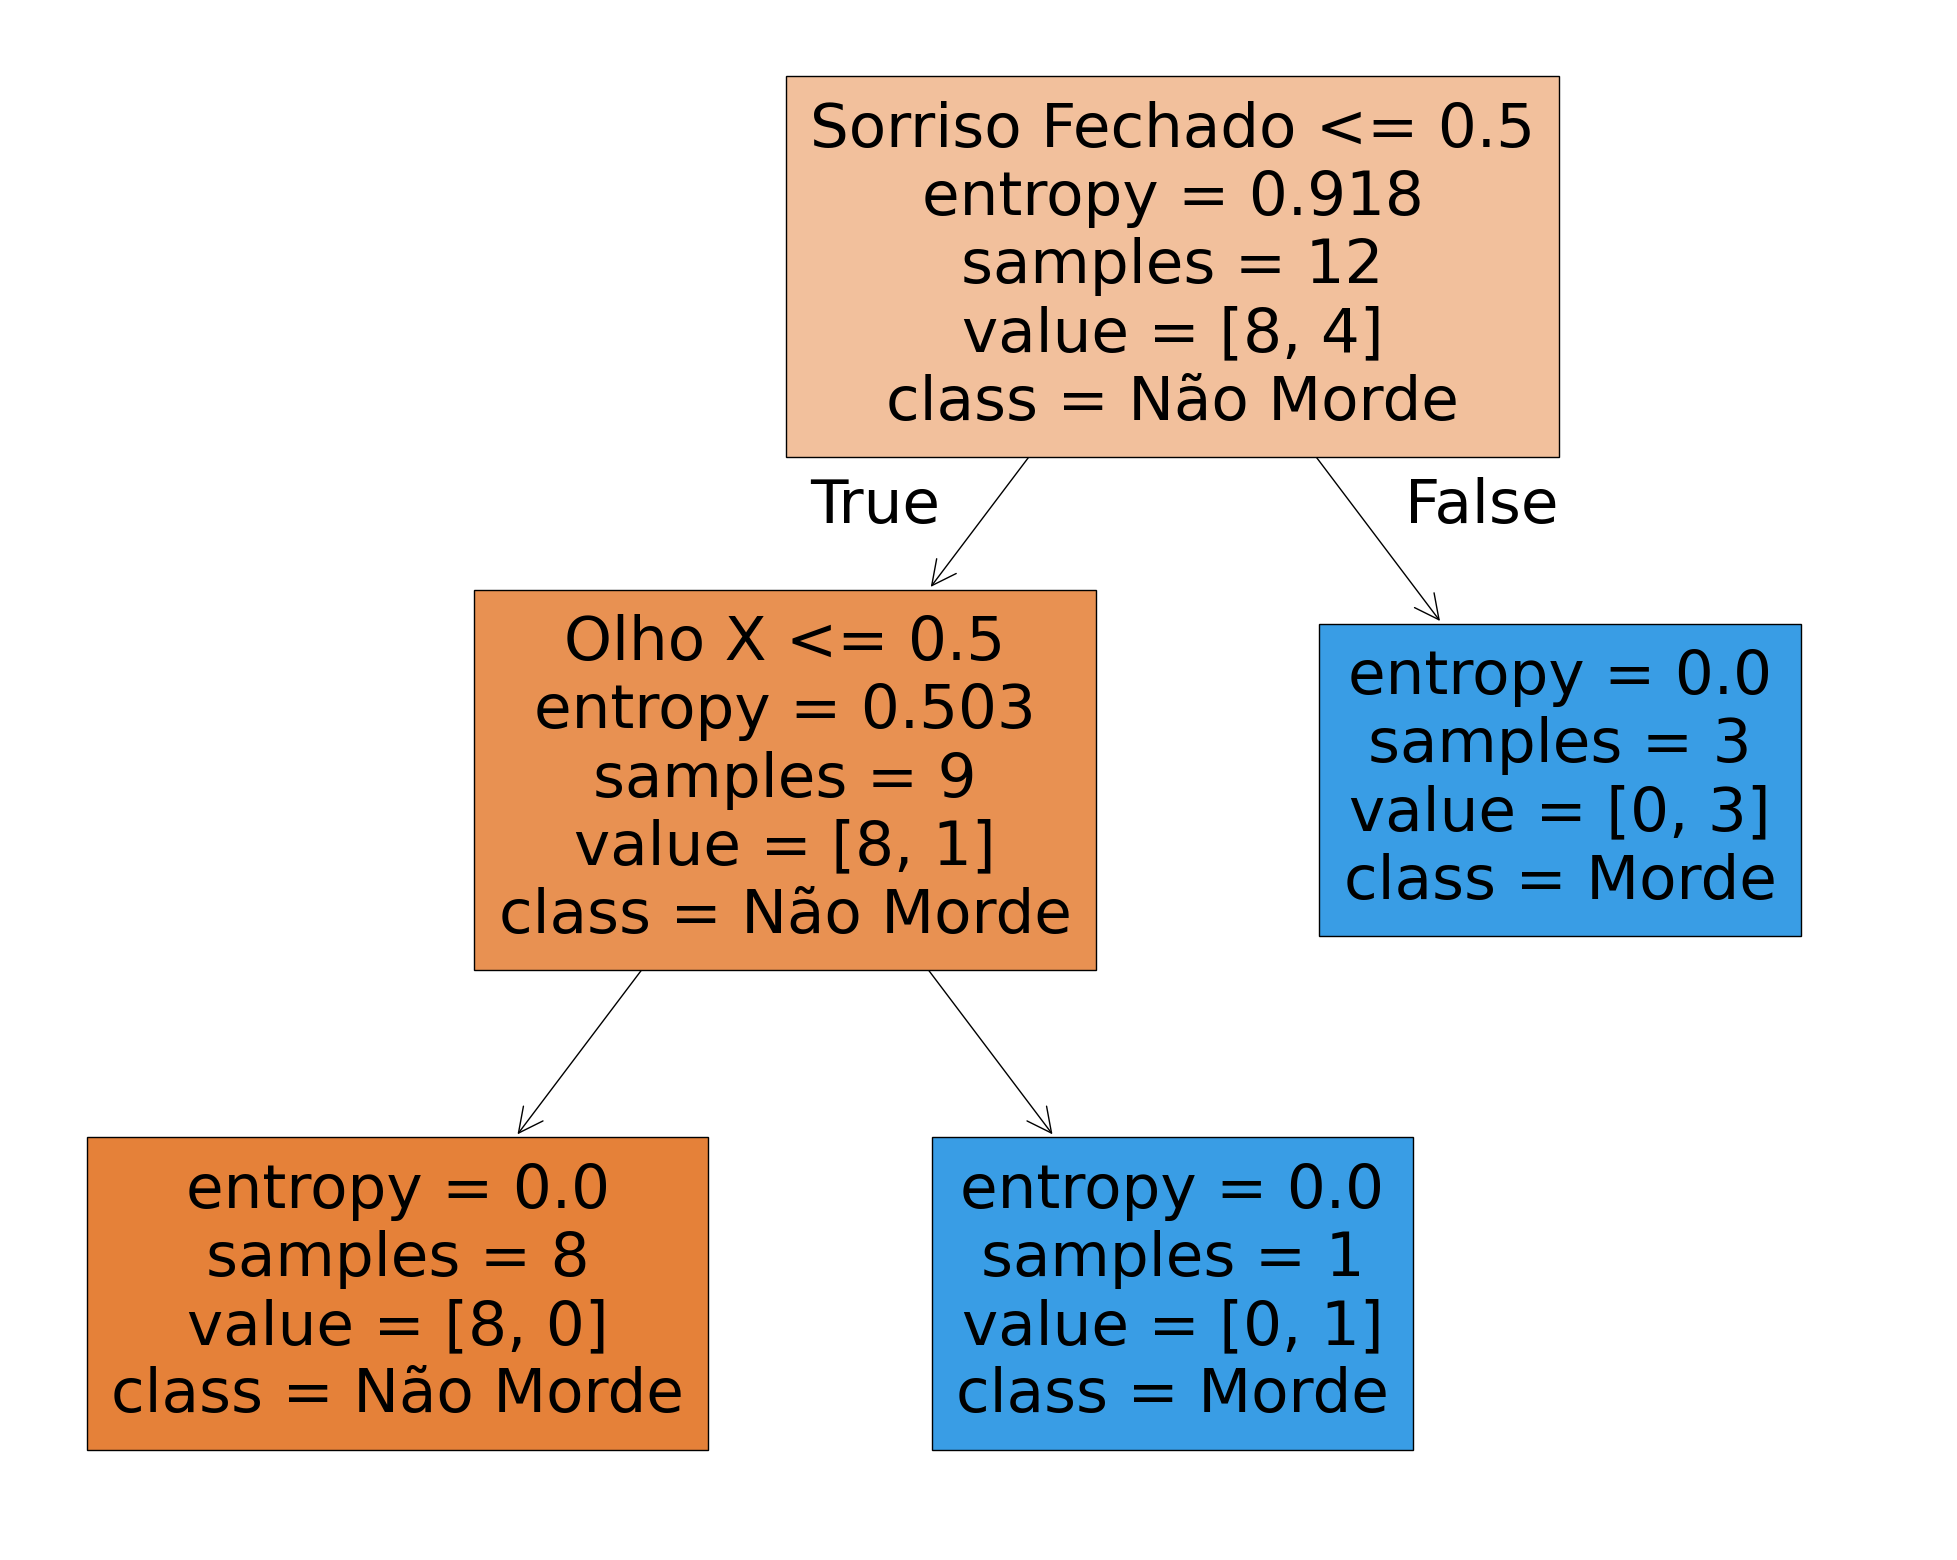

In [6]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=caracteristicas, class_names=morde, filled=True)

Aqui, por exemplo, em dados não antes vistos, que chamamos de datasets de teste, conseguimos adivinhar corretamente todos os exemplos.

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test = pd.read_csv('caracteristicas_teste.csv')
y_test = pd.read_csv('morde_ou_nao_teste.csv')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 1.0


### Considerações finais

Em nossa jornada, atravessamos o terreno teórico e prático das árvores de decisão, uma ferramenta vital na caixa de ferramentas da inteligência artificial. Mas o que ganhamos com essa compreensão?

Primeiro: reconhecemos o poder da IA em transformar dados brutos em insights acionáveis, um processo que se assemelha à nossa própria tomada de decisões baseada na experiência e observação. As árvores de decisão são uma representação digital dessa capacidade humana.

Segundo: o conceito de entropia e ganho de informação nos lembra que, embora os dados possam ser complexos e muitas vezes confusos, existe uma lógica e matemática subjacente que pode ser descoberta e utilizada para fazer previsões informadas e precisas.

Terceiro: o uso de ferramentas de programação como a sklearn para implementar essas árvores de decisão demonstram o casamento da teoria matemática com a tecnologia moderna, permitindo-nos realizar cálculos complexos e análises de dados em uma fração do tempo que levaria manualmente.

E, finalmente, refletimos sobre a importância da generalização. Em IA, como na vida, o objetivo é aprender regras e padrões que não apenas se aplicam a casos já conhecidos, mas que também são robustos o suficiente para se adaptar ao novo e ao desconhecido.

Até a próxima!
